# Cerro Negro Isobar Comparison
This notebook contains code to calculate and plot isobars for all melt inclusion compositions in the Roggensack (2001) Cerro Negro dataset. Visualizations of the sample compositions are also shown.

In [9]:
import VESIcal as v
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Import the data
basalts = v.BatchFile("../../Datasets/cerro_negro.xlsx")

#Calculate the average composition of the entire dataset
columns = list(basalts.get_data())
avg_vals = []
for col in columns:
    try:
        avg_vals.append(basalts.data[col].mean())
    except:
        avg_vals.append(np.NaN)

avg_dict = dict(zip(columns, avg_vals))
avg_dict = v.Sample(avg_dict)
avg_dict = avg_dict.get_composition()

In [11]:
#Calculate isobars for all samples at 3,000 bars
isobar_list = []
for index, row in basalts.get_data().iterrows():
    isobar_list.append(v.calculate_isobars_and_isopleths(sample=basalts.get_sample_composition(samplename=row.name, asSampleClass=True), temperature=1200, pressure_list=[3000], isopleth_list=[0.5], print_status=True).result[0])

Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 3000 bars
 done.                                                                                                                          

In [12]:
#Calculate isobar at 3,000 bars for "Average Sample"
avg_isobar = v.calculate_isobars_and_isopleths(sample=v.Sample(avg_dict), temperature=1200, pressure_list=[3000], isopleth_list=[0.5], print_status=True).result[0]

Calculating isobar at 3000 bars
 done.                                                                                                                           
Done!


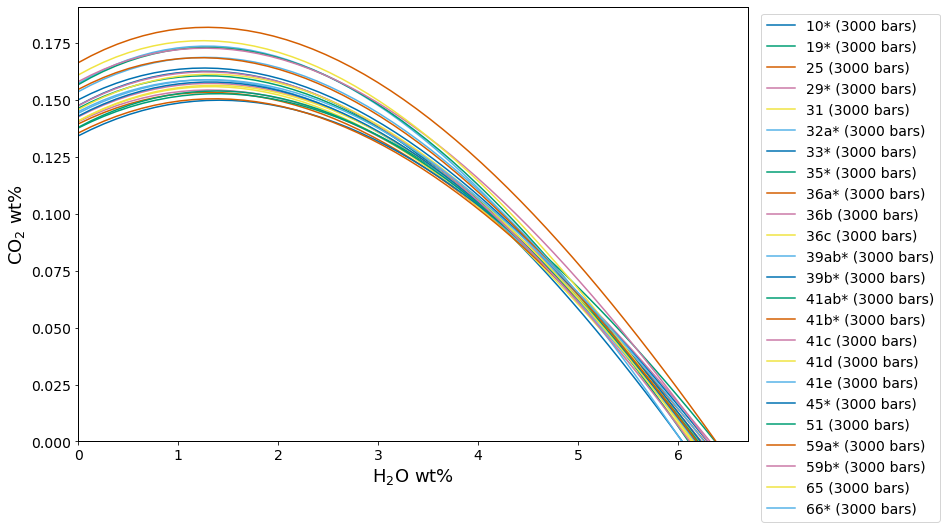

In [13]:
#Plot all isobars from dataset
fig, ax = v.plot(isobars=[isobar for isobar in isobar_list], isobar_labels=[row.name for index, row in basalts.get_data().iterrows()])
v.show()

In [14]:
#calculate area under each curve for dataset and "Average Sample"
areas = []
samples = [row.name for index, row in basalts.get_data().iterrows()]
for isobar in isobar_list:
    x_vals = np.array([row["H2O_liq"] for index, row in isobar.iterrows()])
    y_vals = np.array([row["CO2_liq"] for index, row in isobar.iterrows()])
    area_under_the_curve = scipy.integrate.simps(y_vals, x_vals)
    areas.append(area_under_the_curve)

average_area = scipy.integrate.simps(avg_isobar['CO2_liq'], avg_isobar['H2O_liq'])

In [15]:
#Get maximum and minimum areas from dataset, with corresponding sample names
area_dict = dict(zip(samples, areas))
max_sample = max(area_dict, key=area_dict.get)
min_sample = min(area_dict, key=area_dict.get)
print("ISM values for entire dataset: \n" + str(area_dict) + "\n")
print("'Average Sample' ISM = " + str(average_area))

ISM values for entire dataset: 
{'10*': 0.7022819465071327, '19*': 0.7099136139260563, '25': 0.6857312598170663, '29*': 0.695924387830727, '31': 0.6857687923781917, '32a*': 0.6981014010522483, '33*': 0.6794443343045162, '35*': 0.6983519455793235, '36a*': 0.6737980998214915, '36b': 0.7003022556595832, '36c': 0.6967340008516693, '39ab*': 0.7498568732956311, '39b*': 0.7254227234598157, '41ab*': 0.7551961491046426, '41b*': 0.8234961646619593, '41c': 0.7722062233987507, '41d': 0.7707806170426788, '41e': 0.7414508710572187, '45*': 0.698942062143863, '51': 0.6872175014737218, '59a*': 0.7393345811368386, '59b*': 0.7091201176734402, '65': 0.7108223496071367, '66*': 0.7105774340560991}

'Average Sample' ISM = 0.7160099478056647


In [16]:
#Now, calculate isobars for the max and min samples at multiple pressures
max_isobars, max_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_composition(max_sample, asSampleClass=True), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result
min_isobars, min_isopleths = v.calculate_isobars_and_isopleths(sample=basalts.get_sample_composition(min_sample, asSampleClass=True), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

#Calculate isobars for the average composition
avg_isobars, avg_isopleths = v.calculate_isobars_and_isopleths(sample=v.Sample(avg_dict), temperature=1200, pressure_list=[500, 1000, 2000, 3000, 4000], isopleth_list=[0.5], print_status=True).result

Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Calculating isobar at 3000 bars
 done.                                                                                                                           
Calculating isobar at 4000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 10

In [17]:
#Make dataset with all data except for max and min values
other_data = basalts.get_data().drop([max_sample, min_sample])

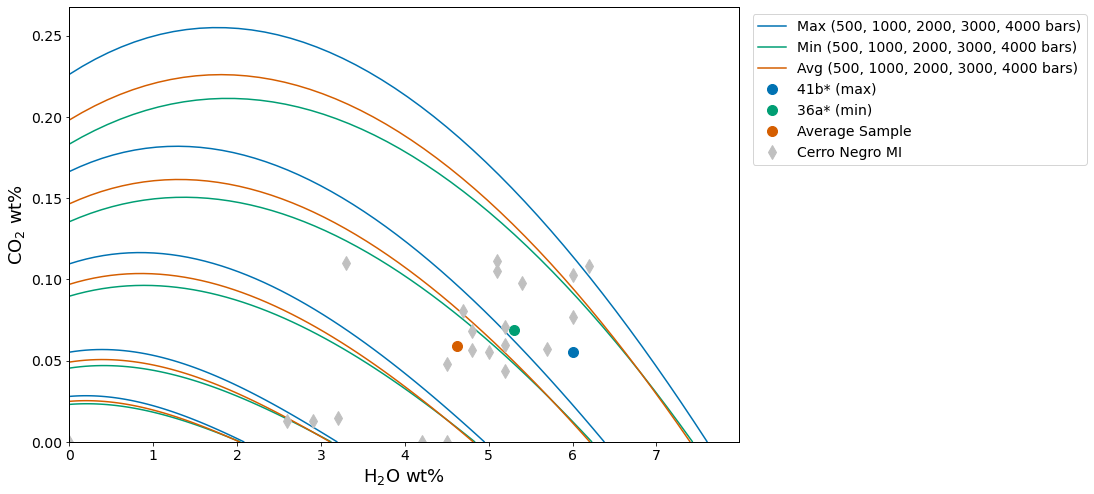

In [18]:
#set up what to pass to v.plot
isobars = [max_isobars, 
           min_isobars, 
           avg_isobars]

isobar_labels = ["Max", 
                 "Min", 
                 "Avg"]

custom_H2O=[basalts.get_sample_composition(max_sample)["H2O"], 
            basalts.get_sample_composition(min_sample)["H2O"], 
            avg_dict["H2O"], 
            other_data["H2O"]]

custom_CO2=[basalts.get_sample_composition(max_sample)["CO2"], 
            basalts.get_sample_composition(min_sample)["CO2"], 
            avg_dict["CO2"], 
            other_data["CO2"]]

custom_labels = [str(max_sample) + " (max)", 
                 str(min_sample) + " (min)", 
                 "Average Sample", 
                 "Cerro Negro MI"]

custom_colors = [v.vplot.color_list[0], 
                 v.vplot.color_list[1], 
                 v.vplot.color_list[2],
                 'silver']

custom_symbols = ['o',
                  'o',
                  'o',
                  'd']

fig, ax = v.plot(isobars=isobars, isobar_labels=isobar_labels, 
       custom_H2O=custom_H2O, 
       custom_CO2=custom_CO2, 
       custom_labels=custom_labels,
       custom_colors=custom_colors,
       custom_symbols=custom_symbols)

v.show()

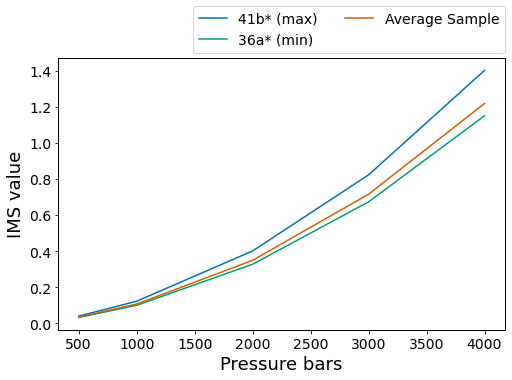

In [19]:
pressure_vals = [500, 1000, 2000, 3000, 4000]

max_IMS_dict = {}
min_IMS_dict = {}
avg_IMS_dict = {}

IMS_dicts = [max_IMS_dict,
            min_IMS_dict,
            avg_IMS_dict]

for i in range(len(isobars)):
    IMS_dicts[i].update({"Pressure": pressure_vals})
    IMS_list = []
    for pressure in pressure_vals:
        IMS_list.append(scipy.integrate.simps(isobars[i].loc[isobars[i]['Pressure']==pressure]["CO2_liq"], isobars[i].loc[isobars[i]['Pressure']==pressure]["H2O_liq"]))
        IMS_dicts[i].update({"IMS": IMS_list})
        
    
labels = ["Maximum, Minimum, Average"]

fig, ax = plt.subplots(1, figsize = (8,5))

for i in range(len(IMS_dicts)):
    ax.plot(IMS_dicts[i]["Pressure"], IMS_dicts[i]["IMS"], label=custom_labels[i])
    ax.set_xlabel("Pressure bars")
    ax.set_ylabel("IMS value")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img3.pdf')

In [20]:
max_IMS_dict

{'Pressure': [500, 1000, 2000, 3000, 4000],
 'IMS': [0.03964674037699495,
  0.12230521769251522,
  0.4013123848066756,
  0.8234961646619593,
  1.4033484003431105]}

3


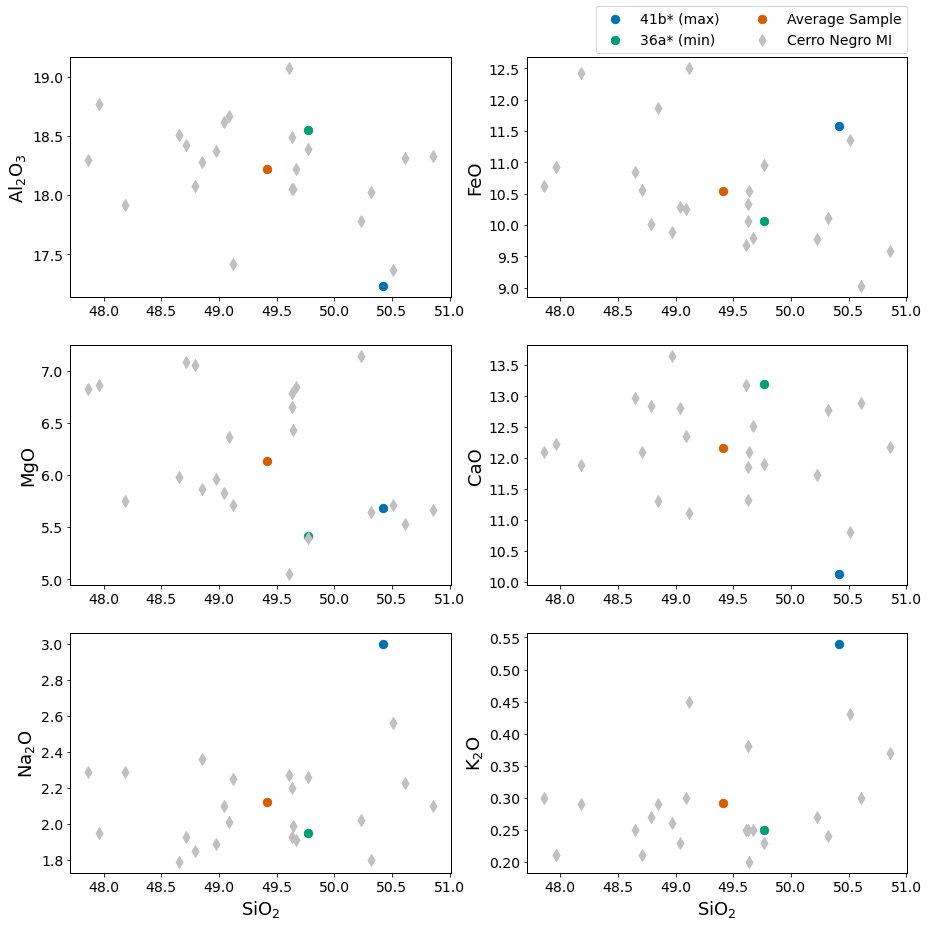

In [21]:
other_oxides = ["Al2O3", "FeO", "MgO", "CaO", "Na2O", "K2O"]
my_samples = [basalts.get_sample_composition(max_sample),
              basalts.get_sample_composition(min_sample),
             avg_dict,
             other_data]

fig, axs = plt.subplots(3,2, figsize = (15,15))
print(len(axs))

for j in range(len(my_samples)):
    axs[0][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Al2O3"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][0].set_ylabel("Al$_2$O$_3$")
    axs[0][1].scatter(my_samples[j]["SiO2"], my_samples[j]["FeO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0][1].set_ylabel("FeO")
    axs[1][0].scatter(my_samples[j]["SiO2"], my_samples[j]["MgO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][0].set_ylabel("MgO")
    axs[1][1].scatter(my_samples[j]["SiO2"], my_samples[j]["CaO"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1][1].set_ylabel("CaO")
    axs[2][0].scatter(my_samples[j]["SiO2"], my_samples[j]["Na2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][0].set_ylabel("Na$_2$O")
    axs[2][0].set_xlabel("SiO$_2$")
    axs[2][1].scatter(my_samples[j]["SiO2"], my_samples[j]["K2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2][1].set_ylabel("K$_2$O")
    axs[2][1].set_xlabel("SiO$_2$")
    
axs[0][1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img4.pdf')

# Alternative plots

In [22]:
#Calculate Saturation Pressure for all samples
other_file = v.BatchFile_from_DataFrame(dataframe=other_data)
satP_other = other_file.calculate_saturation_pressure(temperature=1200)
satP_max = v.calculate_saturation_pressure(sample=basalts.get_sample_composition(max_sample, asSampleClass=True), temperature=1200, verbose=True).result
satP_min = v.calculate_saturation_pressure(sample=basalts.get_sample_composition(min_sample, asSampleClass=True), temperature=1200, verbose=True).result
satP_avg = v.calculate_saturation_pressure(sample=v.Sample(avg_dict), temperature=1200, verbose=True).result

[=                   ] 9%  Working on sample 19*                            duanDriver-2: t = 1473.15, p = 18000, z = 2.93699, v = 1.99853, delv = 0, dx = -2.84187e-14, iter = 43
duanDriver-2: t = 1473.15, p = 8000, z = 2.04948, v = 3.13787, delv = 0, dx = -3.20995e-14, iter = 34
[==========          ] 55%  Working on sample 39b*                             duanDriver-2: t = 1473.15, p = 20000, z = 3.10608, v = 1.90223, delv = 0, dx = -5.61829e-14, iter = 38
duanDriver-2: t = 1473.15, p = 7000, z = 1.79102, v = 3.13388, delv = 0, dx = -2.62307e-14, iter = 40
[==============      ] 73%  Working on sample 41e                              duanDriver-2: t = 1473.15, p = 16000, z = 2.69942, v = 2.06649, delv = 0, dx = -4.73211e-14, iter = 40
[=================   ] 86%  Working on sample 59a*                            duanDriver-2: t = 1473.15, p = 20000, z = 3.10138, v = 1.89936, delv = 0, dx = -2.56214e-14, iter = 39
duanDriver-2: t = 1473.15, p = 14000, z = 2.51022, v = 2.19616, delv = 0

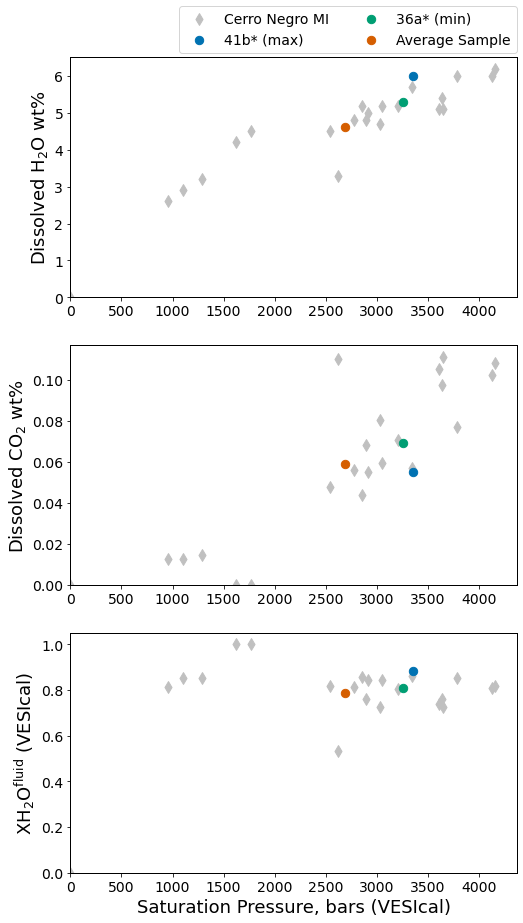

In [23]:
#Create alternative plots using Matplotlib
single_data = [satP_max,
               satP_min,
               satP_avg]

single_samples = [basalts.get_sample_composition(max_sample),
                 basalts.get_sample_composition(min_sample),
                 avg_dict]

fig, axs = plt.subplots(3, figsize = (8,15))
axs[0].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["H2O"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])
axs[1].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["CO2"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])
axs[2].scatter(satP_other["SaturationP_bars_VESIcal"], satP_other["XH2O_fl_VESIcal"], marker=custom_symbols[3], s=70, color=custom_colors[3], label=custom_labels[3])

for j in range(len(single_data)):
    axs[0].scatter(single_data[j]["SaturationP_bars"], single_samples[j]["H2O"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[0].set_ylabel("Dissolved H$_2$O wt%")
    axs[0].set_ylim(0)
    axs[0].set_xlim(0)
    axs[1].scatter(single_data[j]["SaturationP_bars"], single_samples[j]["CO2"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[1].set_ylabel("Dissolved CO$_2$ wt%")
    axs[1].set_ylim(0)
    axs[1].set_xlim(0)
    axs[2].scatter(single_data[j]["SaturationP_bars"], single_data[j]["XH2O_fl"], marker=custom_symbols[j], s=70, color=custom_colors[j], label=custom_labels[j])
    axs[2].set_ylabel("XH$_2$O$^{fluid}$ (VESIcal)")
    axs[2].set_ylim(0)
    axs[2].set_xlabel("Saturation Pressure, bars (VESIcal)")
    axs[2].set_xlim(0)

axs[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=2, borderaxespad=0.)

#fig.savefig('Cerro_Negro_img5.pdf')

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Saturation Pressure, bars (VESIcal)', ylabel='Dissolved H2O wt%'>)

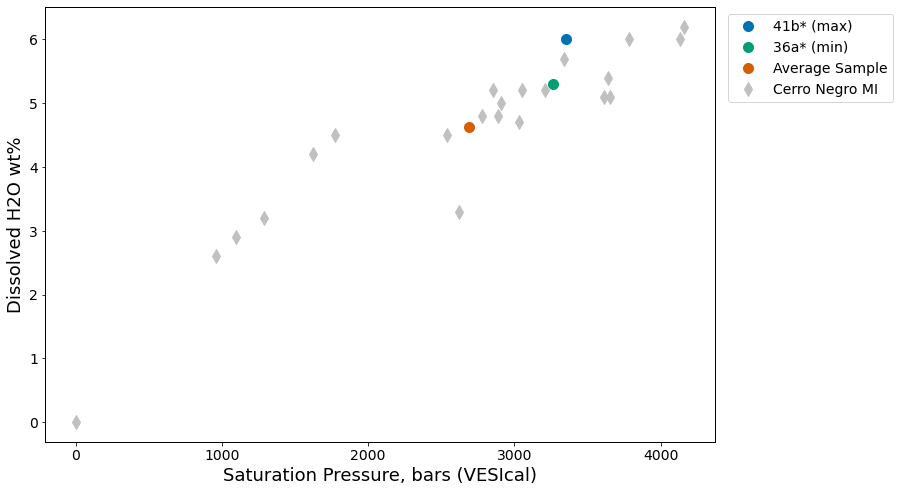

In [24]:
#Create alternative plots using VESIcal's scatterplot() function
single_samples = [basalts.get_sample_composition(max_sample),
                 basalts.get_sample_composition(min_sample),
                 avg_dict]

v.vplot.scatterplot(custom_x=[satP_max['SaturationP_bars'],
                        satP_min['SaturationP_bars'],
                        satP_avg['SaturationP_bars'],
                       satP_other['SaturationP_bars_VESIcal']],
              custom_y=[single_samples[0]['H2O'],
                        single_samples[1]['H2O'],
                        single_samples[2]['H2O'],
                       satP_other['H2O']],
             custom_symbols=custom_symbols,
             custom_colors=custom_colors,
             custom_labels=custom_labels,
             xlabel="Saturation Pressure, bars (VESIcal)",
             ylabel="Dissolved H2O wt%")

# Calculate saturation pressures for each composition

Here we calculate the saturation pressures of each melt inclusion using: a) the composition of the melt inclusion; b) the composition of the "minimum" melt inclusion (36a*); c) the composition of the "maximum" melt inclusion (41b*); and d) the composition of the "average" melt inclusion as calculated above.

In [25]:
satP_data_orig = v.BatchFile('cerro_negro_satP_compare.xlsx')
satP_data_min = v.BatchFile('cerro_negro_satP_compare.xlsx', sheet_name='min')
satP_data_max = v.BatchFile('cerro_negro_satP_compare.xlsx', sheet_name='max')
satP_data_avg = v.BatchFile('cerro_negro_satP_compare.xlsx', sheet_name='avg')

In [26]:
satP_orig = satP_data_orig.calculate_saturation_pressure(temperature=1200)
satP_min = satP_data_min.calculate_saturation_pressure(temperature=1200)
satP_max = satP_data_max.calculate_saturation_pressure(temperature=1200)
satP_avg = satP_data_avg.calculate_saturation_pressure(temperature=1200)

[=                   ] 8%  Working on sample 19*                            duanDriver-2: t = 1473.15, p = 18000, z = 2.93699, v = 1.99853, delv = 0, dx = -2.84187e-14, iter = 43
duanDriver-2: t = 1473.15, p = 8000, z = 2.04948, v = 3.13787, delv = 0, dx = -3.20995e-14, iter = 34
[==========          ] 54%  Working on sample 39b*                             duanDriver-2: t = 1473.15, p = 20000, z = 3.10608, v = 1.90223, delv = 0, dx = -5.61829e-14, iter = 38
duanDriver-2: t = 1473.15, p = 7000, z = 1.79102, v = 3.13388, delv = 0, dx = -2.62307e-14, iter = 40
[============        ] 62%  Working on sample 41b*                             duanDriver-2: t = 1473.15, p = 11000, z = 2.15688, v = 2.40168, delv = 0, dx = -6.00986e-14, iter = 37
[===============     ] 75%  Working on sample 41e                            duanDriver-2: t = 1473.15, p = 16000, z = 2.69942, v = 2.06649, delv = 0, dx = -4.73211e-14, iter = 40
[=================   ] 88%  Working on sample 59a*                       

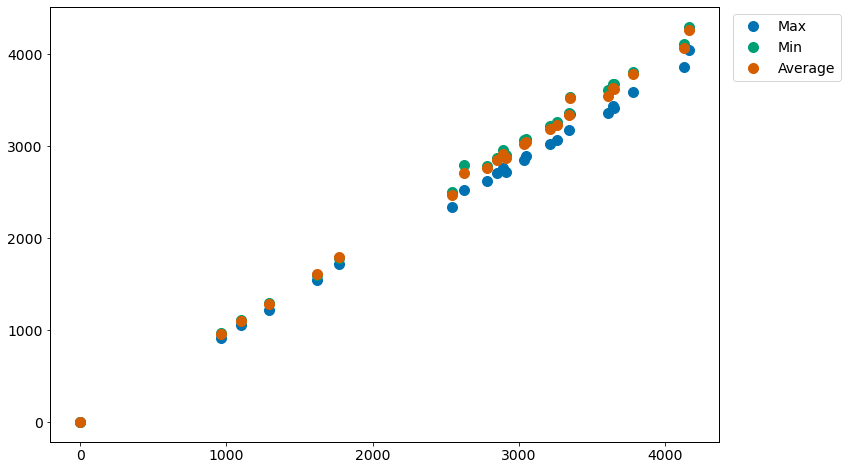

In [27]:
fig, ax = v.vplot.scatterplot(custom_x=[satP_orig["SaturationP_bars_VESIcal"], satP_orig["SaturationP_bars_VESIcal"], satP_orig["SaturationP_bars_VESIcal"]],
              custom_y=[satP_max["SaturationP_bars_VESIcal"], satP_min["SaturationP_bars_VESIcal"], satP_avg["SaturationP_bars_VESIcal"]],
              custom_labels=["Max", "Min", "Average"])
v.show()